# Imports

In [34]:
from fastai2.vision.all import *

import kornia

import tensorflow as tf
from tfrecord.tfrecord import *

path = Path('../data/flowers/').resolve()

# Loading data

In [4]:
def unpack_sample(feats):
    return {
        'class' : unpack_int64_list(feats['class']),
        'image' : unpack_bytes_list(feats['image'])
    }

train_fnames = get_files(path/'train', extensions='.tfrec')
test_fnames = get_files(path/'val', extensions='.tfrec')

data = []
for name in train_fnames+test_fnames:
    r = Reader(str(name), unpack_sample)
    for sample in r:
        data.append([sample['image'][0], sample['class'][0]])

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


# DataLoaders

In [5]:
get_x = lambda o: PILImage.create(io.BytesIO(o[0]))
get_y = lambda o: o[1]

def get_items(noop): return data

splitter = IndexSplitter(range(12753, len(data)))

## Transforms and augmentation

In [6]:
item_tfms = [RandomResizedCrop(224, min_scale=0.5), FlipItem(0.5)]
batch_tfms = [*aug_transforms()]

In [7]:
block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_items,
    get_x=get_x,
    get_y=get_y,
    splitter=splitter,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

In [8]:
dls = block.dataloaders('', bs=32)

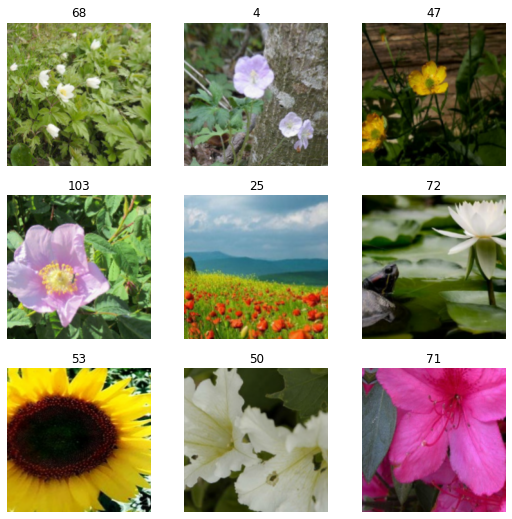

In [9]:
dls.show_batch()

# Learner: `xse_resnet34`

(0.09120108485221863, 0.14454397559165955)

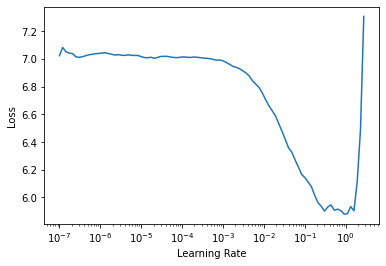

In [15]:
net = xse_resnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)

learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,2.855531,2.827560,0.268588,01:25


(0.0013182567432522773, 3.6307804407442745e-07)

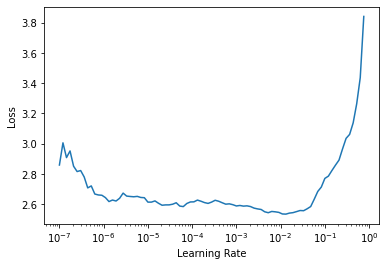

In [16]:
# after 1 epoch
learn.fit(1, 1e-2)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,2.287708,2.242886,0.396552,01:27


(1.58489319801447e-07, 5.248074330665986e-07)

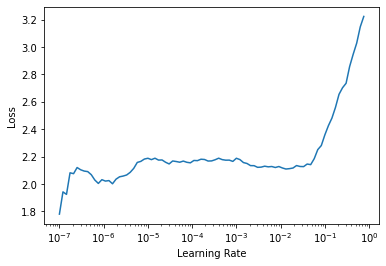

In [17]:
# after 2 epochs
learn.fit(1, 1e-2)
learn.lr_find()

# Experiments with `xse_resnet34`

## `fit_flat_cos(5, lr=1e-2)`: 0.6956 ± 0.0063

In [11]:
# 1/3
net = xse_resnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.758524,2.660874,0.301724,01:25
1,2.243988,2.416518,0.392241,01:26
2,1.925473,1.745891,0.532866,01:27
3,1.663849,1.590741,0.566541,01:28
4,1.134506,1.114130,0.703933,01:29


In [12]:
# 2/3
net = xse_resnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.858560,2.711221,0.317349,01:29
1,2.333899,2.534083,0.337284,01:28
2,1.902493,1.733179,0.538524,01:27
3,1.642238,1.639946,0.561422,01:27
4,1.175779,1.153342,0.694235,01:28


In [13]:
# 3/3
net = xse_resnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.788781,2.645747,0.310075,01:28
1,2.282653,2.677982,0.308190,01:28
2,2.012464,1.779660,0.523707,01:28
3,1.703900,1.591454,0.571660,01:28
4,1.220451,1.188923,0.688578,01:28


In [14]:
results = [
    0.703933, # trial 1
    0.694235, # trial 2
    0.688578, # trial 3
]

print(f'  Avg: {np.mean(results):.4f}'  '\n  Std: ' f'{np.std(results):.4f}')

  Avg: 0.6956
  Std: 0.0063


## `fit_flat_cos(5, lr=6e-3)`:  ± 

In [18]:
# 1/3
net = xse_resnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 6e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.832695,2.689891,0.294181,01:26
1,2.241100,2.375823,0.373384,01:27
2,1.897972,1.708087,0.542026,01:28
3,1.609568,1.500347,0.597252,01:28
4,1.212099,1.154542,0.693427,01:28


In [19]:
# 2/3
net = xse_resnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 6e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.796808,2.690302,0.309537,01:28
1,2.263556,2.261843,0.403287,01:28
2,1.889231,1.707958,0.537446,01:28
3,1.572130,1.537932,0.587823,01:28
4,1.156167,1.117223,0.708244,01:28


In [20]:
# 3/3
net = xse_resnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 6e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.773953,2.602169,0.317080,01:27
1,2.230571,2.468369,0.365032,01:28
2,1.893132,1.718334,0.544181,01:27
3,1.576669,1.605959,0.578933,01:28
4,1.160383,1.127626,0.703933,01:28


In [24]:
results = [
    0.693427, # trial 1
    0.708244, # trial 2
    0.703933, # trial 3
]

print(f'  Avg: {np.mean(results):.4f}'  '\n  Std: ' f'{np.std(results):.4f}')

  Avg: 0.7019
  Std: 0.0062


## `fit_flat_cos(5, lr=3e-2)`:  0.6193 ± 0.0046

In [21]:
# 1/3
net = xse_resnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.073670,2.921333,0.255657,01:27
1,2.577204,2.971268,0.253502,01:28
2,2.332447,2.151996,0.429957,01:28
3,1.988410,1.887493,0.508890,01:27
4,1.464725,1.437130,0.613147,01:27


In [22]:
# 2/3
net = xse_resnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.008741,3.145904,0.229256,01:28
1,2.566291,2.578071,0.323276,01:28
2,2.190251,1.960557,0.469289,01:27
3,1.963947,1.837896,0.513470,01:27
4,1.461995,1.399019,0.624192,01:28


In [23]:
# 3/3
net = xse_resnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.010014,3.580131,0.175108,01:27
1,2.557143,2.652750,0.345097,01:27
2,2.199951,2.103081,0.452586,01:27
3,1.927492,1.794965,0.530711,01:28
4,1.474802,1.403461,0.620420,01:28


In [25]:
results = [
    0.613147, # trial 1
    0.624192, # trial 2
    0.620420, # trial 3
]

print(f'  Avg: {np.mean(results):.4f}'  '\n  Std: ' f'{np.std(results):.4f}')

  Avg: 0.6193
  Std: 0.0046


# `xresnet34_deeper`: very bad

(0.02089296132326126, 0.05754399299621582)

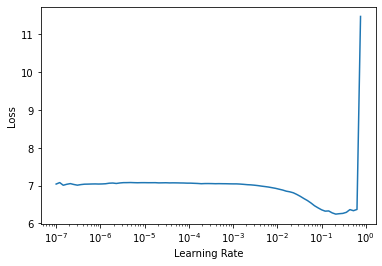

In [26]:
net = xresnet34_deeper(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)

learn.lr_find()

In [27]:
# 1/3
net = xresnet34_deeper(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.358315,3.276245,0.182112,01:22
1,3.096486,3.425138,0.165948,01:22
2,2.834732,2.580898,0.303879,01:23
3,2.663247,2.462226,0.339440,01:24
4,2.205006,2.068696,0.440733,01:24


In [28]:
# 2/3
net = xresnet34_deeper(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.354891,3.198871,0.184806,01:24
1,2.985281,3.396566,0.171875,01:24
2,2.806961,2.594251,0.314386,01:24
3,2.597932,2.438527,0.340248,01:24
4,2.138169,1.971699,0.470097,01:24


In [29]:
# 3/3
net = xresnet34_deeper(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.361771,3.776497,0.118265,01:24
1,3.051267,3.046656,0.237338,01:24
2,2.832164,2.580669,0.308728,01:24
3,2.584780,2.350600,0.364763,01:24
4,2.090459,1.964658,0.471713,01:24


# `xresnet34`: 0.6818 ± 0.0019

(0.025118863582611083, 0.033113110810518265)

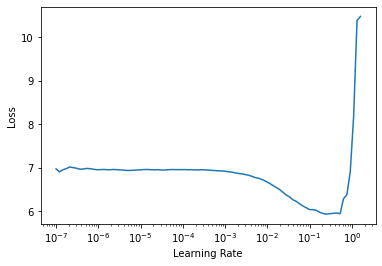

In [30]:
net = xresnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)

learn.lr_find()

In [31]:
# 1/3
net = xresnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.908524,2.764873,0.283405,01:19
1,2.354864,2.521723,0.350216,01:21
2,1.998047,1.790566,0.516703,01:21
3,1.705433,1.603673,0.580280,01:21
4,1.241047,1.180300,0.684537,01:21


In [32]:
# 2/3
net = xresnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.835795,2.847664,0.304149,01:21
1,2.327564,2.794944,0.313308,01:21
2,2.003905,1.808385,0.519935,01:21
3,1.706978,1.638135,0.561961,01:21
4,1.219570,1.177423,0.680496,01:21


In [33]:
# 3/3
net = xresnet34(pretrained=False, sa=True, act_cls=Mish)
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.860805,2.722252,0.300377,01:21
1,2.283515,2.348898,0.387392,01:21
2,2.008255,1.743014,0.538524,01:21
3,1.747099,1.692231,0.557381,01:21
4,1.220592,1.154424,0.694504,01:21


In [36]:
results = [
    0.684537, # trial 1
    0.680496, # trial 2
    0.680496, # trial 3
]

print(f'  Avg: {np.mean(results):.4f}'  '\n  Std: ' f'{np.std(results):.4f}')

  Avg: 0.6818
  Std: 0.0019


# Including MaxBlurPool in `xresnet34`: 0.6686 ± 0.0087

In [37]:
def convert_MP_to_blurMP(model, layer_type_old=nn.MaxPool2d):

    for name, module in reversed(model._modules.items()):
        if len(list(module.children())) > 0:
            # recurse
            model._modules[name] = convert_MP_to_blurMP(module, layer_type_old)

        if type(module) == layer_type_old:
            layer_old = module
            layer_new = kornia.contrib.MaxBlurPool2d(3, True)
            model._modules[name] = layer_new

    return model

(0.02089296132326126, 0.02290867641568184)

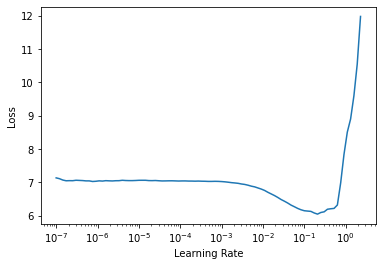

In [38]:
net = convert_MP_to_blurMP(xresnet34(pretrained=False, sa=True, act_cls=Mish))
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)

learn.lr_find()

In [39]:
# 1/3
net = convert_MP_to_blurMP(xresnet34(pretrained=False, sa=True, act_cls=Mish))
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.886171,2.754728,0.268858,01:40
1,2.370564,2.581622,0.353718,01:42
2,2.053043,1.925892,0.477371,01:43
3,1.830827,1.630218,0.569235,01:43
4,1.298626,1.260041,0.660022,01:44


In [40]:
# 2/3
net = convert_MP_to_blurMP(xresnet34(pretrained=False, sa=True, act_cls=Mish))
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.803157,2.662306,0.300647,01:43
1,2.289207,2.561130,0.359644,01:43
2,2.056031,1.826047,0.509429,01:43
3,1.809494,1.720152,0.554688,01:43
4,1.276711,1.250068,0.665410,01:43


In [41]:
# 3/3
net = convert_MP_to_blurMP(xresnet34(pretrained=False, sa=True, act_cls=Mish))
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.907680,2.932401,0.273438,01:43
1,2.396345,2.526721,0.347791,01:43
2,2.067135,1.839903,0.505388,01:43
3,1.771719,1.775364,0.516164,01:43
4,1.287289,1.237183,0.669181,01:44


In [46]:
results = [
    0.660022, # trial 1
    0.665410, # trial 2
    0.680496, # trial 3
]

print(f'  Avg: {np.mean(results):.4f}'  '\n  Std: ' f'{np.std(results):.4f}')

  Avg: 0.6686
  Std: 0.0087


# Including MaxBlurPool in `xse_resnet34`: 0.6889 ± 0.0194

In [43]:
# 1/3 
net = convert_MP_to_blurMP(xse_resnet34(pretrained=False, sa=True, act_cls=Mish))
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.843791,2.780347,0.287985,01:50
1,2.329351,2.401927,0.383890,01:51
2,1.939903,1.776205,0.519666,01:50
3,1.664771,1.517299,0.585399,01:50
4,1.218615,1.142139,0.690194,01:51


In [44]:
# 2/3
net = convert_MP_to_blurMP(xse_resnet34(pretrained=False, sa=True, act_cls=Mish))
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.916892,2.753550,0.280981,01:50
1,2.355675,2.402600,0.366110,01:50
2,2.038054,1.811636,0.510506,01:50
3,1.805451,1.689701,0.530981,01:50
4,1.260728,1.224091,0.664601,01:50


In [45]:
# 3/3
net = convert_MP_to_blurMP(xse_resnet34(pretrained=False, sa=True, act_cls=Mish))
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.843551,2.920069,0.260237,01:50
1,2.296938,2.552055,0.346175,01:51
2,1.915517,1.750749,0.534483,01:51
3,1.622222,1.643389,0.565463,01:51
4,1.140266,1.104769,0.712015,01:51


In [47]:
results = [
    0.690194, # trial 1
    0.664601, # trial 2
    0.712015, # trial 3
]

print(f'  Avg: {np.mean(results):.4f}'  '\n  Std: ' f'{np.std(results):.4f}')

  Avg: 0.6889
  Std: 0.0194


# `bs = 64`: 0.6929 ± 0.0116

In [52]:
item_tfms = [RandomResizedCrop(224, min_scale=0.5), FlipItem(0.5)]
batch_tfms = [*aug_transforms()]

block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_items,
    get_x=get_x,
    get_y=get_y,
    splitter=splitter,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

dls = block.dataloaders('', bs=64)

In [53]:
# 1/3
net = convert_MP_to_blurMP(xse_resnet34(pretrained=False, sa=True, act_cls=Mish))
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.911697,2.677703,0.297144,01:41
1,2.330816,2.332106,0.388739,01:40
2,1.978914,1.945657,0.485991,01:42
3,1.636162,1.748594,0.541756,01:42
4,1.160268,1.127412,0.709052,01:42


In [54]:
# 2/3
net = convert_MP_to_blurMP(xse_resnet34(pretrained=False, sa=True, act_cls=Mish))
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.977420,2.585937,0.322468,01:38
1,2.345881,2.384628,0.383621,01:41
2,1.970171,1.960539,0.484644,01:42
3,1.658211,2.002951,0.481412,01:42
4,1.235870,1.197431,0.682381,01:42


In [55]:
# 3/3
net = convert_MP_to_blurMP(xse_resnet34(pretrained=False, sa=True, act_cls=Mish))
learn = Learner(dls, net, opt_func=ranger, metrics=accuracy)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.945338,3.236603,0.235183,01:42
1,2.348614,2.369370,0.394127,01:42
2,1.949110,1.975350,0.492457,01:42
3,1.690170,1.653767,0.544720,01:42
4,1.240391,1.187140,0.687231,01:42


In [56]:
results = [
    0.709052, # trial 1
    0.682381, # trial 2
    0.687231, # trial 3
]

print(f'  Avg: {np.mean(results):.4f}'  '\n  Std: ' f'{np.std(results):.4f}')

  Avg: 0.6929
  Std: 0.0116
